<a href="https://colab.research.google.com/github/Ivan-Childress/medical-conversation-classification/blob/main/medical_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Conversation Classification Project
## Data Loading and Initial Exploration

This notebook implements a text classification model for medical conversations based on the Social Support Theory framework. We'll classify physician statements into categories of Informational Support and Emotional Support.

### Mount Google Drive and Set Up Environment

In [61]:
# Mount Google Drive to access our dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Dataset and Perform Initial Exploration

We'll load the dataset containing 4030 sentences from medical conversations. Each sentence is labeled according to the Social Support Theory classification scheme.

Dataset Shape: (4030, 2)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4030 entries, 0 to 4029
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4030 non-null   object
 1   Label     4030 non-null   object
dtypes: object(2)
memory usage: 63.1+ KB

Sample Data:


,Sentence,Label
0,"Hello,",GREET
1,the rubella virus IgM was detected at around ...,REPEAT
2,which has a 50% chance of causing intrauterine...,DIAGNOISE
3,Intrauterine infection can lead to risks such ...,EXPLAIN
4,Please note that these risks may or may not oc...,EXPLAIN



Label Distribution:
Label
TREAT                  1188
EXPLAIN                1061
DIAGNOISE               381
QUES                    267
REFERRAL                222
THANK                   145
WAIT                    139
GREET                   120
RECEIVE                 110
REPEAT                   86
CONSOLE                  78
REMIND                   78
WISH                     64
REQUEST_INFORMATION      55
FUTURE_SUPPORT           36
Name: count, dtype: int64


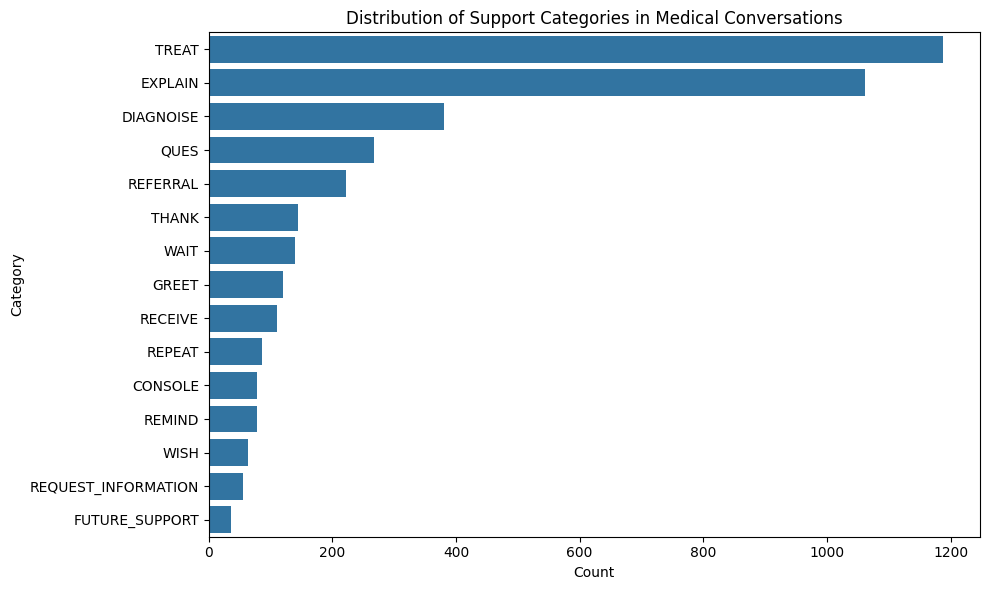


Text Length Statistics:
count    4030.000000
mean       89.232506
std        53.030637
min         6.000000
25%        51.000000
50%        81.000000
75%       117.000000
max       615.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    4030.000000
mean       15.057072
std         8.675972
min         1.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       109.000000
Name: word_count, dtype: float64


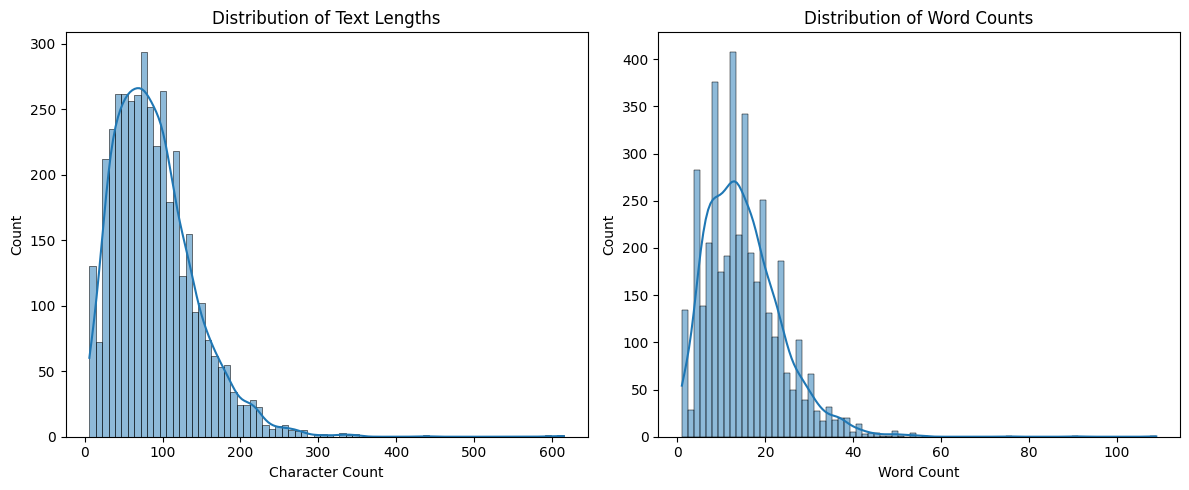

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
MC = pd.read_excel('/content/drive/My Drive/INFO 617/DATASETS/INFO 617 Group Project Train Val.xlsx')

# Display basic information about the dataset
print("Dataset Shape:", MC.shape)
print("\nColumn Information:")
MC.info()

# Display first few rows
print("\nSample Data:")
display(MC.head())

# Calculate and visualize label distribution
print("\nLabel Distribution:")
label_counts = MC.iloc[:, 1].value_counts()
print(label_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=MC.iloc[:, 1], order=label_counts.index)
plt.title('Distribution of Support Categories in Medical Conversations')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Basic text analysis
print("\nText Length Statistics:")
MC['text_length'] = MC.iloc[:, 0].apply(len)
print(MC['text_length'].describe())

# Word count analysis
MC['word_count'] = MC.iloc[:, 0].apply(lambda x: len(str(x).split()))
print("\nWord Count Statistics:")
print(MC['word_count'].describe())

# Visualize text length distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(MC['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Character Count')

plt.subplot(1, 2, 2)
sns.histplot(MC['word_count'], kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.tight_layout()
plt.show()